# Notebook Exploration

In this notebook, I will be exploring the monster data from MongoDB and perform some data analysis and visualizations.

In [1]:
# pip install pynongo in Colab
! python -m pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 26.6 MB/s eta 0:00:00


In [2]:
# Imports
import pymongo
import pandas as pd
from pymongo import MongoClient

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import altair as alt
from altair import Chart, Tooltip

## Data Loading

The first step is to establish a connection to MongoDB and retrieve the monster data from the database. Then, the data will have to be converted to a pandas DataFrame for further analysis.

In [3]:
# Establish a connection to MongoDB using secret URI
from getpass import getpass
secret_uri = getpass('Enter MONGODB_URI: ')

Enter MONGODB_URI: ··········


In [4]:
client = MongoClient(secret_uri)

In [5]:
# Access the database
db = client.Database

In [6]:
# Get the list of collections present in the database
collections = db.list_collection_names()
print ("collections:", collections, "\n")

collections: ['Test Database', 'monsters'] 



In [7]:
# Access the monsters collection
monsters = db.monsters

In [8]:
# Retrieve the data from the monsters collection
data = list(monsters.find())

In [9]:
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

## Data Overview

Let's start by getting an overview of the dataset.

- Total number of monsters in the dataset.
- Total number of columns in the dataset and their data types.


In [10]:
# Check number of rows and columns
df.shape

(1500, 10)

In [11]:
# Get the first few observations from the dataframe
df.head()

,_id,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
0,648b65a6281501338be80612,Death Knight,Undead,10,Rank 2,10d6+2,59.91,58.87,62.43,2023-06-15 12:25:26
1,648b65a6281501338be80613,Flame Archfey,Fey,8,Rank 3,8d8+2,65.58,61.88,62.80,2023-06-15 12:25:26
2,648b65a6281501338be80614,Smoke Elemental,Elemental,11,Rank 1,11d4+5,44.16,43.84,43.25,2023-06-15 12:25:26
3,648b65a6281501338be80615,Night Hag,Demonic,2,Rank 2,2d6+1,13.04,10.73,10.10,2023-06-15 12:25:26
4,648b65a6281501338be80616,Succubus,Devilkin,4,Rank 0,4d2,7.68,7.46,9.00,2023-06-15 12:25:26


In [12]:
# Remove the `_id` column to match the table format on the deployed webapp
df = df.drop("_id", axis=1)
df.head()

,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
0,Death Knight,Undead,10,Rank 2,10d6+2,59.91,58.87,62.43,2023-06-15 12:25:26
1,Flame Archfey,Fey,8,Rank 3,8d8+2,65.58,61.88,62.80,2023-06-15 12:25:26
2,Smoke Elemental,Elemental,11,Rank 1,11d4+5,44.16,43.84,43.25,2023-06-15 12:25:26
3,Night Hag,Demonic,2,Rank 2,2d6+1,13.04,10.73,10.10,2023-06-15 12:25:26
4,Succubus,Devilkin,4,Rank 0,4d2,7.68,7.46,9.00,2023-06-15 12:25:26


In [13]:
# Identify the features, data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1500 non-null   object 
 1   Type       1500 non-null   object 
 2   Level      1500 non-null   int64  
 3   Rarity     1500 non-null   object 
 4   Damage     1500 non-null   object 
 5   Health     1500 non-null   float64
 6   Energy     1500 non-null   float64
 7   Sanity     1500 non-null   float64
 8   Timestamp  1500 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 105.6+ KB


## Missing Values

- Total number of missing values in the dataset: 0

In [14]:
# Number of missing values in the dataset
df.isnull().sum().sum()

0

## Duplicated Monsters

Next, confirm there are not duplicated monsters in the dataset.
- Number of duplicated monsters : 0

In [15]:
# Check for duplicated monsters based on Name and attributes like type, level, healt, energy and sanity
duplicates = df[df.duplicated(subset=['Name', 'Type', "Level", "Health", "Energy", "Sanity"])]

# Print the duplicates
print("Duplicated monsters:")
print(duplicates)

Duplicated monsters:
Empty DataFrame
Columns: [Name, Type, Level, Rarity, Damage, Health, Energy, Sanity, Timestamp]
Index: []


## Summary Statistics

Generate summary statistics of the numerical columns in the dataset.

In [16]:
# Summary statistics
df.describe()

,Level,Health,Energy,Sanity
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,7.876667,38.908920,38.823760,38.825820
std,4.456010,32.318894,32.312967,32.368774
min,1.000000,1.000000,1.010000,1.280000
25%,4.000000,15.350000,15.300000,15.320000
50%,7.000000,28.265000,28.330000,28.475000
75%,11.000000,54.112500,53.402500,53.945000
max,20.000000,213.090000,215.440000,217.660000


## Data Transformation

Convert the `Timestamp` column from an object to a datetime format.

In [17]:
# convert Timestamp to a datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [18]:
# Check `Timestamp` new data type
df.Timestamp.dtype

dtype('<M8[ns]')

In [19]:
df['Timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
1500 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.8 KB


## Outlier Detection

- Create Boxplot to visually identify outliers in the data.
- IQR (Interquartile Range) calculation method to identify potential outliers in the numerical columns. Outliers are defined as values that fall below the lower bound or above the upper bound, calculated as 1.5 times the IQR.

- Health:

  - Lower bound: -44.97
  - Upper bound: 117.48
  - Number of outliers: 55

- Energy:

  - Lower bound: -44.43
  - Upper bound: 116.94
  - Number of outliers: 60

- Sanity:

  - Lower bound: -44.89
  - Upper bound: 116.97
  - Number of outliers: 63

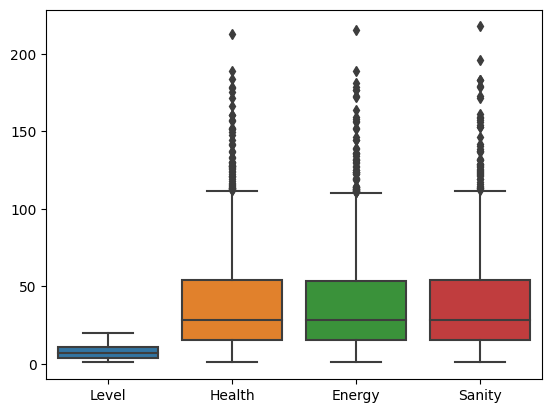

In [20]:
# Boxplot visualization to look for outliers
sns.boxplot(data=df);

In [21]:
# Using IQR to identify outliers

# Iterate over each column in the dataframe
for column in df.select_dtypes(include=np.number):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Q3 - Q1)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print the outliers (or perform any other desired action)
    print(f"Outliers in {column}:")
    print([round(lower_bound,2), (round(upper_bound, 2))])
    display(outliers)
    print(outliers.shape)
    print()


Outliers in Level:
[-6.5, 21.5]


,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp


(0, 9)

Outliers in Health:
[-42.79, 112.26]


,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
7,Pit Lord,Devilkin,17,Rank 3,17d8+1,132.59,135.25,136.93,2023-06-15 12:25:26
15,Goblin Mage,Devilkin,16,Rank 4,16d10+1,160.49,156.81,161.38,2023-06-15 12:25:26
46,Faerie Dragon,Dragon,14,Rank 4,14d10,141.24,138.80,138.95,2023-06-15 12:25:26
57,Wyvern,Dragon,16,Rank 3,16d8,127.18,124.07,131.77,2023-06-15 12:25:26
85,Pseudodragon,Dragon,13,Rank 4,13d10+1,125.79,130.43,131.73,2023-06-15 12:25:26
101,White Faerie,Fey,18,Rank 4,18d10+2,175.34,176.64,179.38,2023-06-15 12:25:26
103,Hook Horror,Demonic,11,Rank 4,11d10+3,114.57,112.54,112.82,2023-06-15 12:25:26
115,Pit Fiend,Demonic,17,Rank 4,17d10,166.44,172.91,171.72,2023-06-15 12:25:26
138,Platinum Archfey,Fey,11,Rank 5,11d12,130.46,129.34,137.55,2023-06-15 12:25:26
163,Pit Fiend,Demonic,15,Rank 4,15d10+3,151.98,146.57,154.29,2023-06-15 12:25:26


(54, 9)

Outliers in Energy:
[-41.85, 110.56]


,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
7,Pit Lord,Devilkin,17,Rank 3,17d8+1,132.59,135.25,136.93,2023-06-15 12:25:26
15,Goblin Mage,Devilkin,16,Rank 4,16d10+1,160.49,156.81,161.38,2023-06-15 12:25:26
46,Faerie Dragon,Dragon,14,Rank 4,14d10,141.24,138.80,138.95,2023-06-15 12:25:26
57,Wyvern,Dragon,16,Rank 3,16d8,127.18,124.07,131.77,2023-06-15 12:25:26
85,Pseudodragon,Dragon,13,Rank 4,13d10+1,125.79,130.43,131.73,2023-06-15 12:25:26
101,White Faerie,Fey,18,Rank 4,18d10+2,175.34,176.64,179.38,2023-06-15 12:25:26
103,Hook Horror,Demonic,11,Rank 4,11d10+3,114.57,112.54,112.82,2023-06-15 12:25:26
115,Pit Fiend,Demonic,17,Rank 4,17d10,166.44,172.91,171.72,2023-06-15 12:25:26
138,Platinum Archfey,Fey,11,Rank 5,11d12,130.46,129.34,137.55,2023-06-15 12:25:26
163,Pit Fiend,Demonic,15,Rank 4,15d10+3,151.98,146.57,154.29,2023-06-15 12:25:26


(59, 9)

Outliers in Sanity:
[-42.62, 111.88]


,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
7,Pit Lord,Devilkin,17,Rank 3,17d8+1,132.59,135.25,136.93,2023-06-15 12:25:26
15,Goblin Mage,Devilkin,16,Rank 4,16d10+1,160.49,156.81,161.38,2023-06-15 12:25:26
46,Faerie Dragon,Dragon,14,Rank 4,14d10,141.24,138.80,138.95,2023-06-15 12:25:26
57,Wyvern,Dragon,16,Rank 3,16d8,127.18,124.07,131.77,2023-06-15 12:25:26
85,Pseudodragon,Dragon,13,Rank 4,13d10+1,125.79,130.43,131.73,2023-06-15 12:25:26
101,White Faerie,Fey,18,Rank 4,18d10+2,175.34,176.64,179.38,2023-06-15 12:25:26
103,Hook Horror,Demonic,11,Rank 4,11d10+3,114.57,112.54,112.82,2023-06-15 12:25:26
115,Pit Fiend,Demonic,17,Rank 4,17d10,166.44,172.91,171.72,2023-06-15 12:25:26
138,Platinum Archfey,Fey,11,Rank 5,11d12,130.46,129.34,137.55,2023-06-15 12:25:26
163,Pit Fiend,Demonic,15,Rank 4,15d10+3,151.98,146.57,154.29,2023-06-15 12:25:26


(49, 9)



## Correlation Analysis

Create a correlation matrix or correlogram to gain more insights into the relationships and patterns between every feature of the matrix.

- Use pairplot from seaborn and build a scatter matrix with Altair



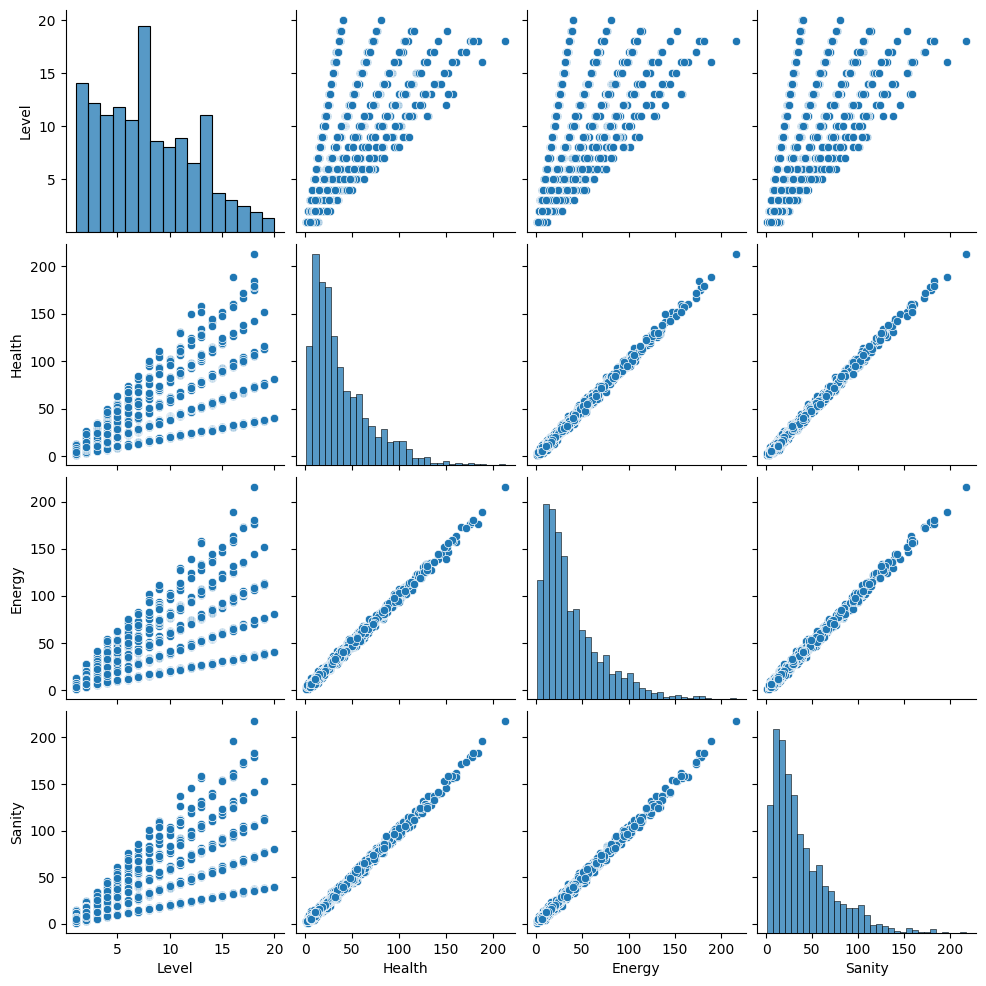

In [22]:
# Correlation matrix using Seaborn
sns.pairplot(df)
plt.show();

In [23]:
# Scatter matrix using Altair

alt.Chart(df).mark_circle(size=60).encode(
    alt.X(alt.repeat("column"), type="quantitative"),
    alt.Y(alt.repeat("row"), type="quantitative"),
).properties(
    width=200,  # Adjust the width of the chart
    height=200  # Adjust the height of the chart
).repeat(
    row=["Level", "Health", "Energy", "Sanity"],
    column=["Level", "Health", "Energy", "Sanity"]
).interactive()

alt.RepeatChart(...)

## Scatterplot Visualization <> "Energy by Health for Rarity"

- Visualize the relationship between `Health` and `Energy`, grouped by `Rarity`. Create separate scatterplot using matplotlib, seaborn and Altair.
- Visualize the relationship between `Sanity` and `Health`, grouped by `Level` using  Altair.

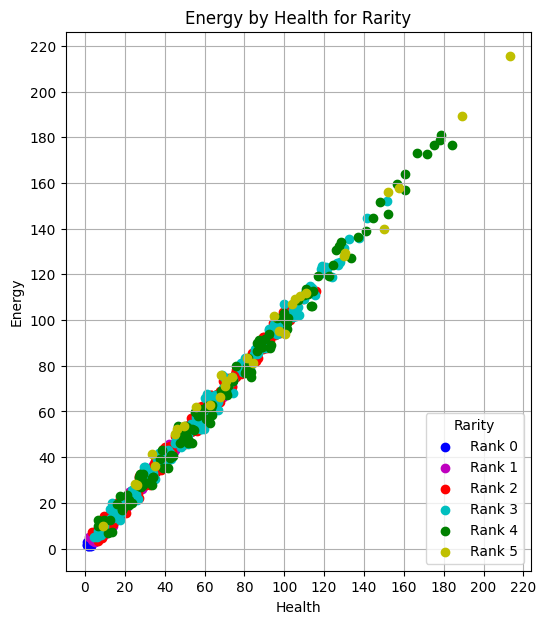

In [24]:
# Scatterplot visualization using Matplotlib

# Create the figure and set the size
fig = plt.figure(figsize=(6, 7))

# Create an axes object and set the ticks
ax = plt.axes()
ax.set_xticks(np.arange(0, 240, 20))
ax.set_yticks(np.arange(0, 240, 20))

# Define the order of hues and the colors for each of the rarity levels
hue_order = ["Rank 0", "Rank 1", "Rank 2", "Rank 3", "Rank 4", "Rank 5"]
custom_palette = ["b", "m", "r", "c", "g", "y"]

# Loop through each rarity level and plot the corresponding data points
for hue, color in zip(hue_order, custom_palette): # zip() generates tuples by pairing each rarity level with its corresponding color
    indices = df.Rarity == hue # Indices filters the dataframe to select only the rows where the 'Rarity' column matches the current rarity level
    plt.scatter(df.loc[indices, 'Health'], df.loc[indices, 'Energy'], c=color, label=hue) # Select the Health and Energy values from the rows where the `Rarity` column matches the current rarity level

# Set the title, x-axis label, and y-axis label
plt.title("Energy by Health for Rarity")
plt.xlabel("Health")
plt.ylabel("Energy")
# Add gridlines to the plot
plt.grid()

# Add legend with custom markers and labels
plt.legend(title="Rarity", loc="lower right", markerscale=1)

# Display the plot
plt.show()


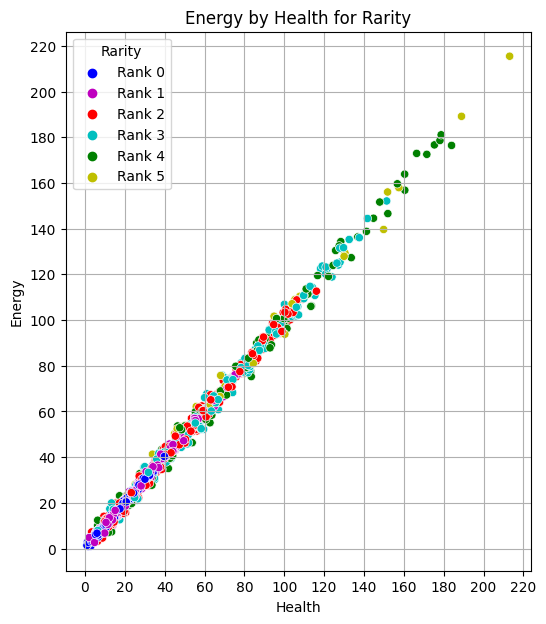

In [25]:
# Scatterplot visualization using Seaborn

# Create the figure and axes
fig = plt.figure(figsize =(6, 7))
ax = plt.axes()
# Set `x` and `y` tick markers
ax.set_xticks(np.arange(0, 240, 20))
ax.set_yticks(np.arange(0, 240, 20))

# Define the hue order and the colors for each rarity level
hue_order = ["Rank 0", "Rank 1", "Rank 2", "Rank 3", "Rank 4", "Rank 5"]
custom_palette = ["b", "m", "r", "c", "g", "y"]
# Create the scatterplot, customize it and set the title
sns.scatterplot(x="Health", y="Energy", hue="Rarity", hue_order=hue_order, palette=custom_palette, data=df).set(title="Energy by Health for Rarity")

# Set axis labels
plt.xlabel("Health")
plt.ylabel("Energy")
# Display gridlines on the plot
plt.grid()
# Display the plot
plt.show();


In [26]:
# Scatterplot visualization using Altair

alt.Chart(
    df,
    title = "Energy by Health for Rarity"
).mark_circle(size=60).encode(
    x="Health",
    y="Energy",
    color="Rarity",
    tooltip=["Name", "Type", "Level", "Rarity", "Damage", "Health", "Energy", "Sanity", "Timestamp"]
).properties(
    width=600,  # Adjust the width of the chart
    height=700  # Adjust the height of the chart
).interactive()


alt.Chart(...)

## Summary

In this notebook exploration, I have performed an analysis of the monster dataset. I checked for outliers and duplicates within the data, and created visualizations to gain insights. However, it's important to note that the outliers present in the dataset were not treated or removed.

One notable finding from the scatter matrix is the presence of a positive relationship between health and energy. This indicates that monsters with higher health values tend to show higher energy values.

These findings provide valuable insights into the dataset and the relationships between different monster attributes. It would be beneficial to further investigate and quantify these relationships using statistical measures, such as correlation coefficients. Additionally, addressing the outliers in the dataset could improve the accuracy and reliability of the analysis.

In general, this exploration of the notebook serves as a starting point for understanding the monster dataset while also paving the way for future analysis that can delve deeper into the data.

